# [ORMIR-MIDS](https://ORMIR-MIDS.github.io/) MedicalVolume class tests
[ORMIR-MIDS](https://ORMIR-MIDS.github.io/) for simple medical image data loading, manipulation and visualization. Without convertion to NIfTI format or creation of the directory structure predifined by ORMIR-MIDS.

- By: [Gianluca Iori](https://github.com/gianthk), Francesco Chiumento
- Code license: MIT
- Narrative license: CC-BY-NC-SA

---
# Aims

- Demonstrate the use of the MedicalVolume class contained in [ormir-mids](https://github.com/ormir-mids/ormir-mids/tree/main) (also in [pyvoxel](https://github.com/pyvoxel/pyvoxel)) for common data handling, image manipulation and processing tasks.
- Methods / tasks tested:
    - [X] DCM load
    - [X] SimpleITK conversion
    - [X] Crop / subvolume
    - [X] View with `napari.viewer()`
    - [ ] `reformat`
    - [X] Some metadata getters

---

# Computational workflow

- Installations:  
    - The [`h5py`](https://docs.h5py.org/en/stable/) module is required to run this notebook
    - For ITK tests ([Section 2](#2.-Convert-to-SimpleITK)) you will neet to install [simpleITK](https://simpleitk.org/)
    - For ([Section 3](#3.-Visualize-with-napari)) you will need to install [napari](https://napari.org/stable/tutorials/fundamentals/installation.html#installation)

### Imports and installation of external visualization packages

In [1]:
# Install napari and pyqt5 for running the napari GUI in the notebook
%pip install -U 'napari[all]'
%pip install pyqt5

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import napari
from napari.utils import nbscreenshot
from ormir_mids.utils.io import load_dicom

/Users/msb/opt/anaconda3/envs/ormir-mids/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### 1. Load dicom file to MedicalVolume object

In [3]:
# load dicom directory
mv = load_dicom("../dicom/Philips_MESE_T2.dcm")

----------------------------------------------- FFFFFFFFFFFFF --------------------------------
210


Take a look at the loaded MedicalVolume object

In [4]:
print(f'Scanner Manufacturer: {mv.bids_header["Manufacturer"]}')
print(f"Scanner Orientation: {mv.orientation}")
print(f"Image Type: {mv.dtype}")
print(f"Image Shape: {mv.shape}")
print(f"Scanner Origin: {mv.scanner_origin}")
print(f"Scanner spacing: {mv.pixel_spacing}")

Scanner Manufacturer: Philips Medical Systems
Scanner Orientation: ('AP', 'RL', 'IS')
Image Type: uint16
Image Shape: (176, 176, 210)
Scanner Origin: (np.float64(240.9552), np.float64(232.94), np.float64(-1053.7351))
Scanner spacing: (np.float64(2.84090900421142), np.float64(2.84090900421142), np.float64(10.0))


#### 1.1. Crop volume
To create a separate subvolume you can do the following. Metadata will be sliced appropriately.

Original Shape: (176, 176, 210)
Subvolume Shape: (40, 40, 40)


/Users/msb/opt/anaconda3/envs/ormir-mids/lib/python3.12/site-packages/napari/utils/notebook_display.py:81: UserWarning: The lxml_html_clean library is not installed, and is required to sanitize alt text for napari screenshots. Alt Text will be stripped altogether.
  warn(
2024-10-22 11:18:17.028 python[11719:136754] +[IMKClient subclass]: chose IMKClient_Legacy
2024-10-22 11:18:17.028 python[11719:136754] +[IMKInputSession subclass]: chose IMKInputSession_Legacy


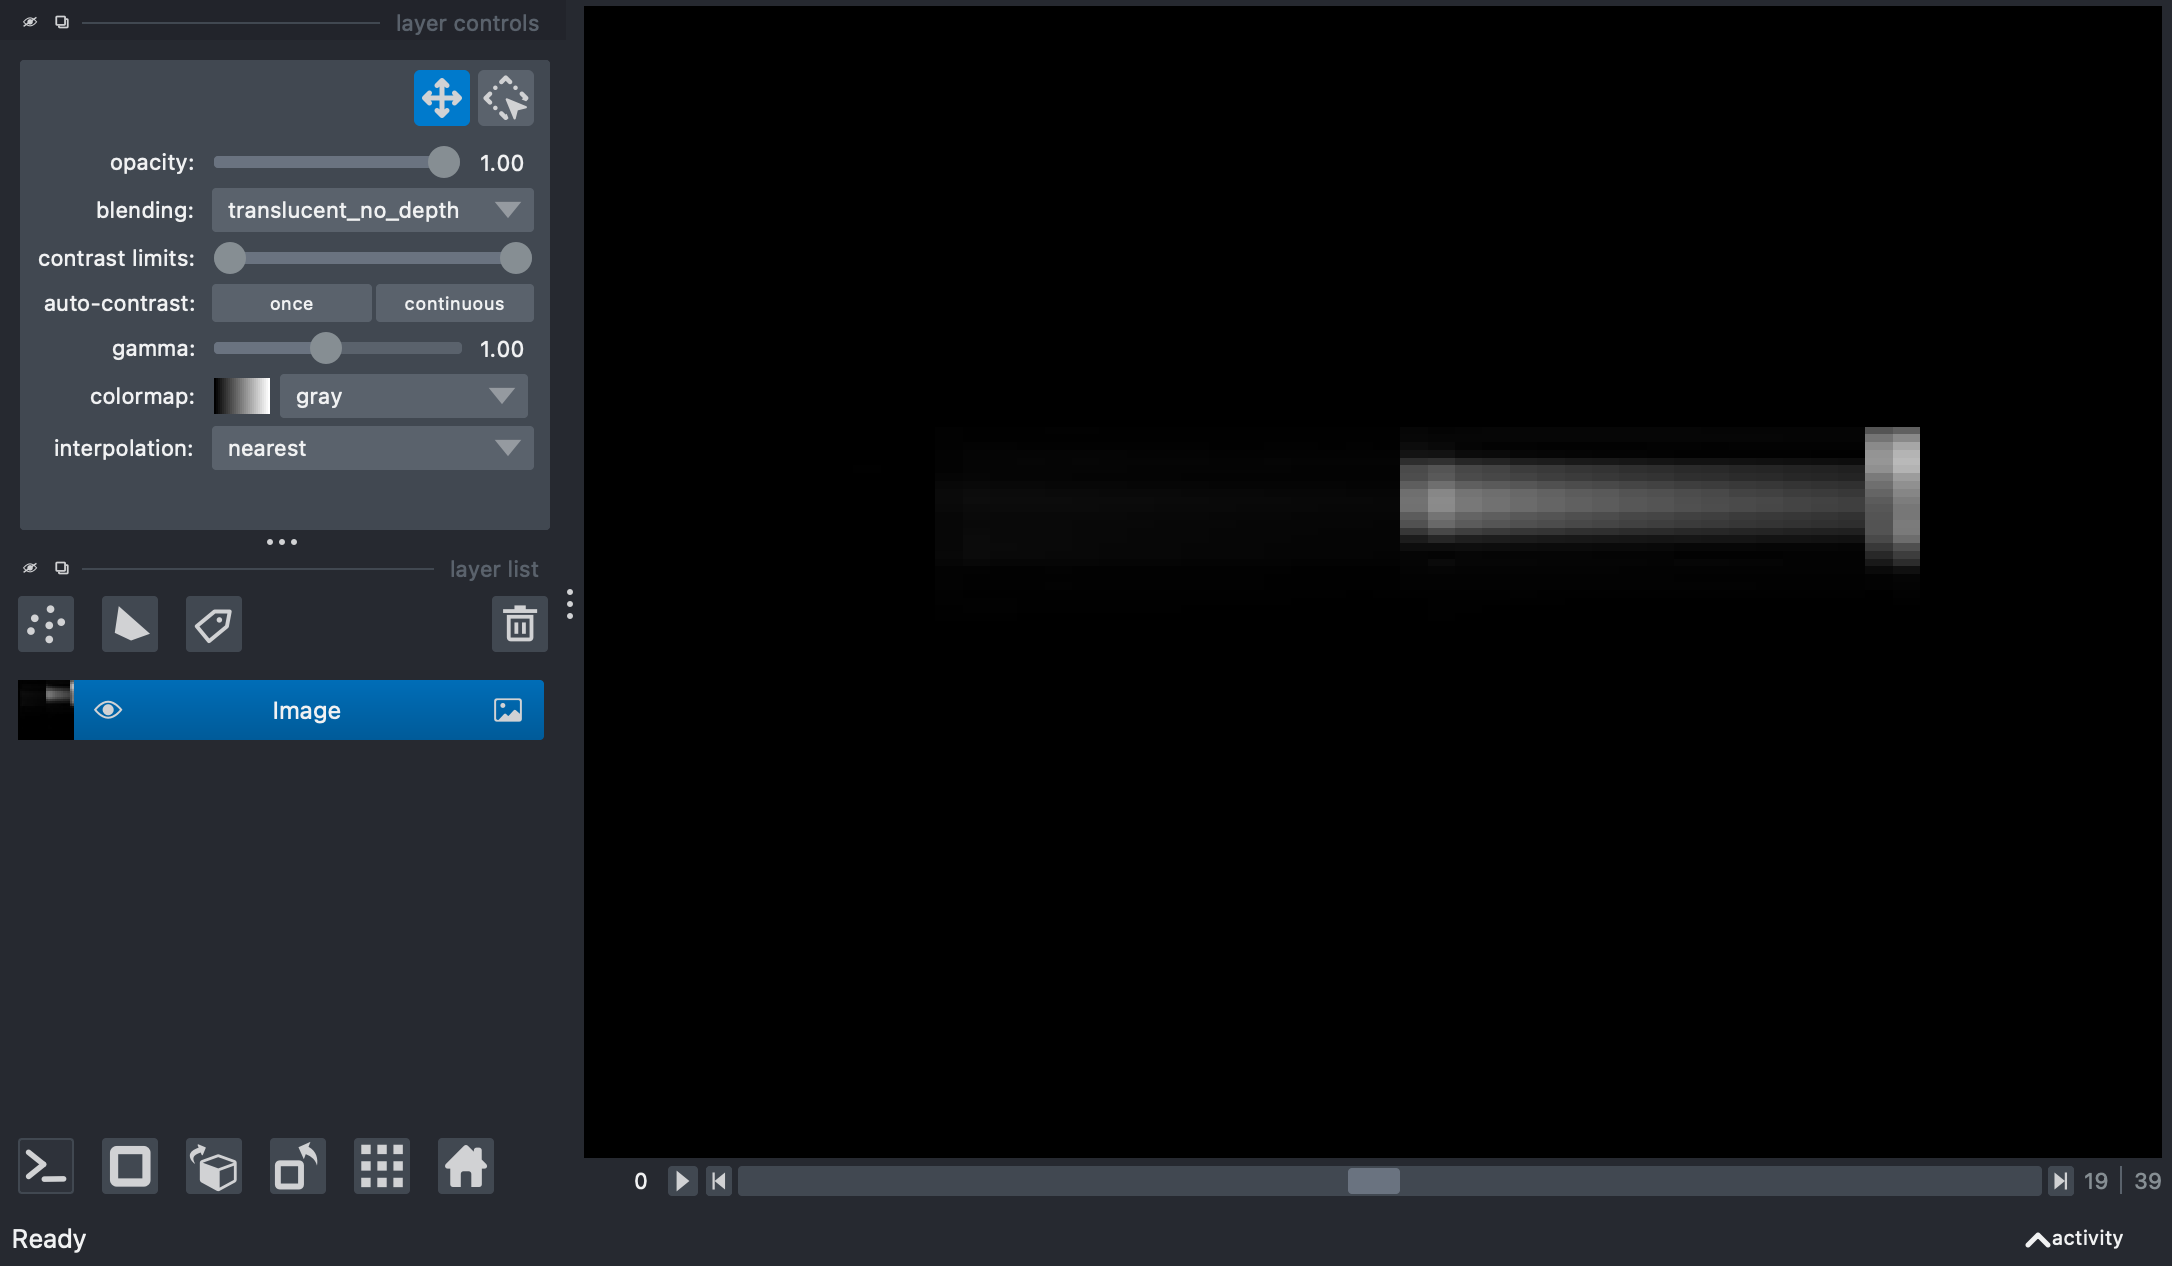

In [5]:
mv_subvolume = mv[50:90, 50:90, 30:70]
print(f"Original Shape: {mv.shape}")
print(f"Subvolume Shape: {mv_subvolume.shape}")

viewer_cropped = napari.view_image(
    mv_subvolume.volume, scale=mv_subvolume.pixel_spacing
)
nbscreenshot(viewer_cropped, alt_text="Cropped MRI DICOM volume")

### 2. Convert to SimpleITK

In [7]:
mv_sitk = mv.to_sitk()

print(
    f"Before conversion, mv is of type: {type(mv)}\nAfter conversion, mv_itk is of type: {type(mv_sitk)}"
)

Before conversion, mv is of type: <class 'voxel.med_volume.MedicalVolume'>
After conversion, mv_itk is of type: <class 'SimpleITK.SimpleITK.Image'>


Inspect ITK image contents:

In [8]:
print(mv_sitk)

Image (0x7fa0a3e07620)
  RTTI typeinfo:   itk::Image<unsigned short, 3u>
  Reference Count: 1
  Modified Time: 1634
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 0
  UpdateMTime: 0
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [176, 176, 210]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [176, 176, 210]
  RequestedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [176, 176, 210]
  Spacing: [2.84091, 2.84091, 10]
  Origin: [-240.955, -232.94, -1053.74]
  Direction: 
-0 1 0
1 -0 0
0 0 1

  IndexToPointMatrix: 
0 2.84091 0
2.84091 0 0
0 0 10

  PointToIndexMatrix: 
0 0.352 0
0.352 0 0
0 0 0.1

  Inverse Direction: 
0 1 0
1 0 0
0 0 1

  PixelContainer: 
    ImportImageContainer (0x7fa0e6746330)
      RTTI typeinfo:   itk::ImportImageContainer<unsigned long, unsigned shor

### 3. Visualize with napari
Take a look at [`napari`](https://napari.org/stable/api/napari.html)'s manual for more info.
You can launch the napari viewer with:

/Users/msb/opt/anaconda3/envs/ormir-mids/lib/python3.12/site-packages/napari/utils/notebook_display.py:81: UserWarning: The lxml_html_clean library is not installed, and is required to sanitize alt text for napari screenshots. Alt Text will be stripped altogether.
  warn(


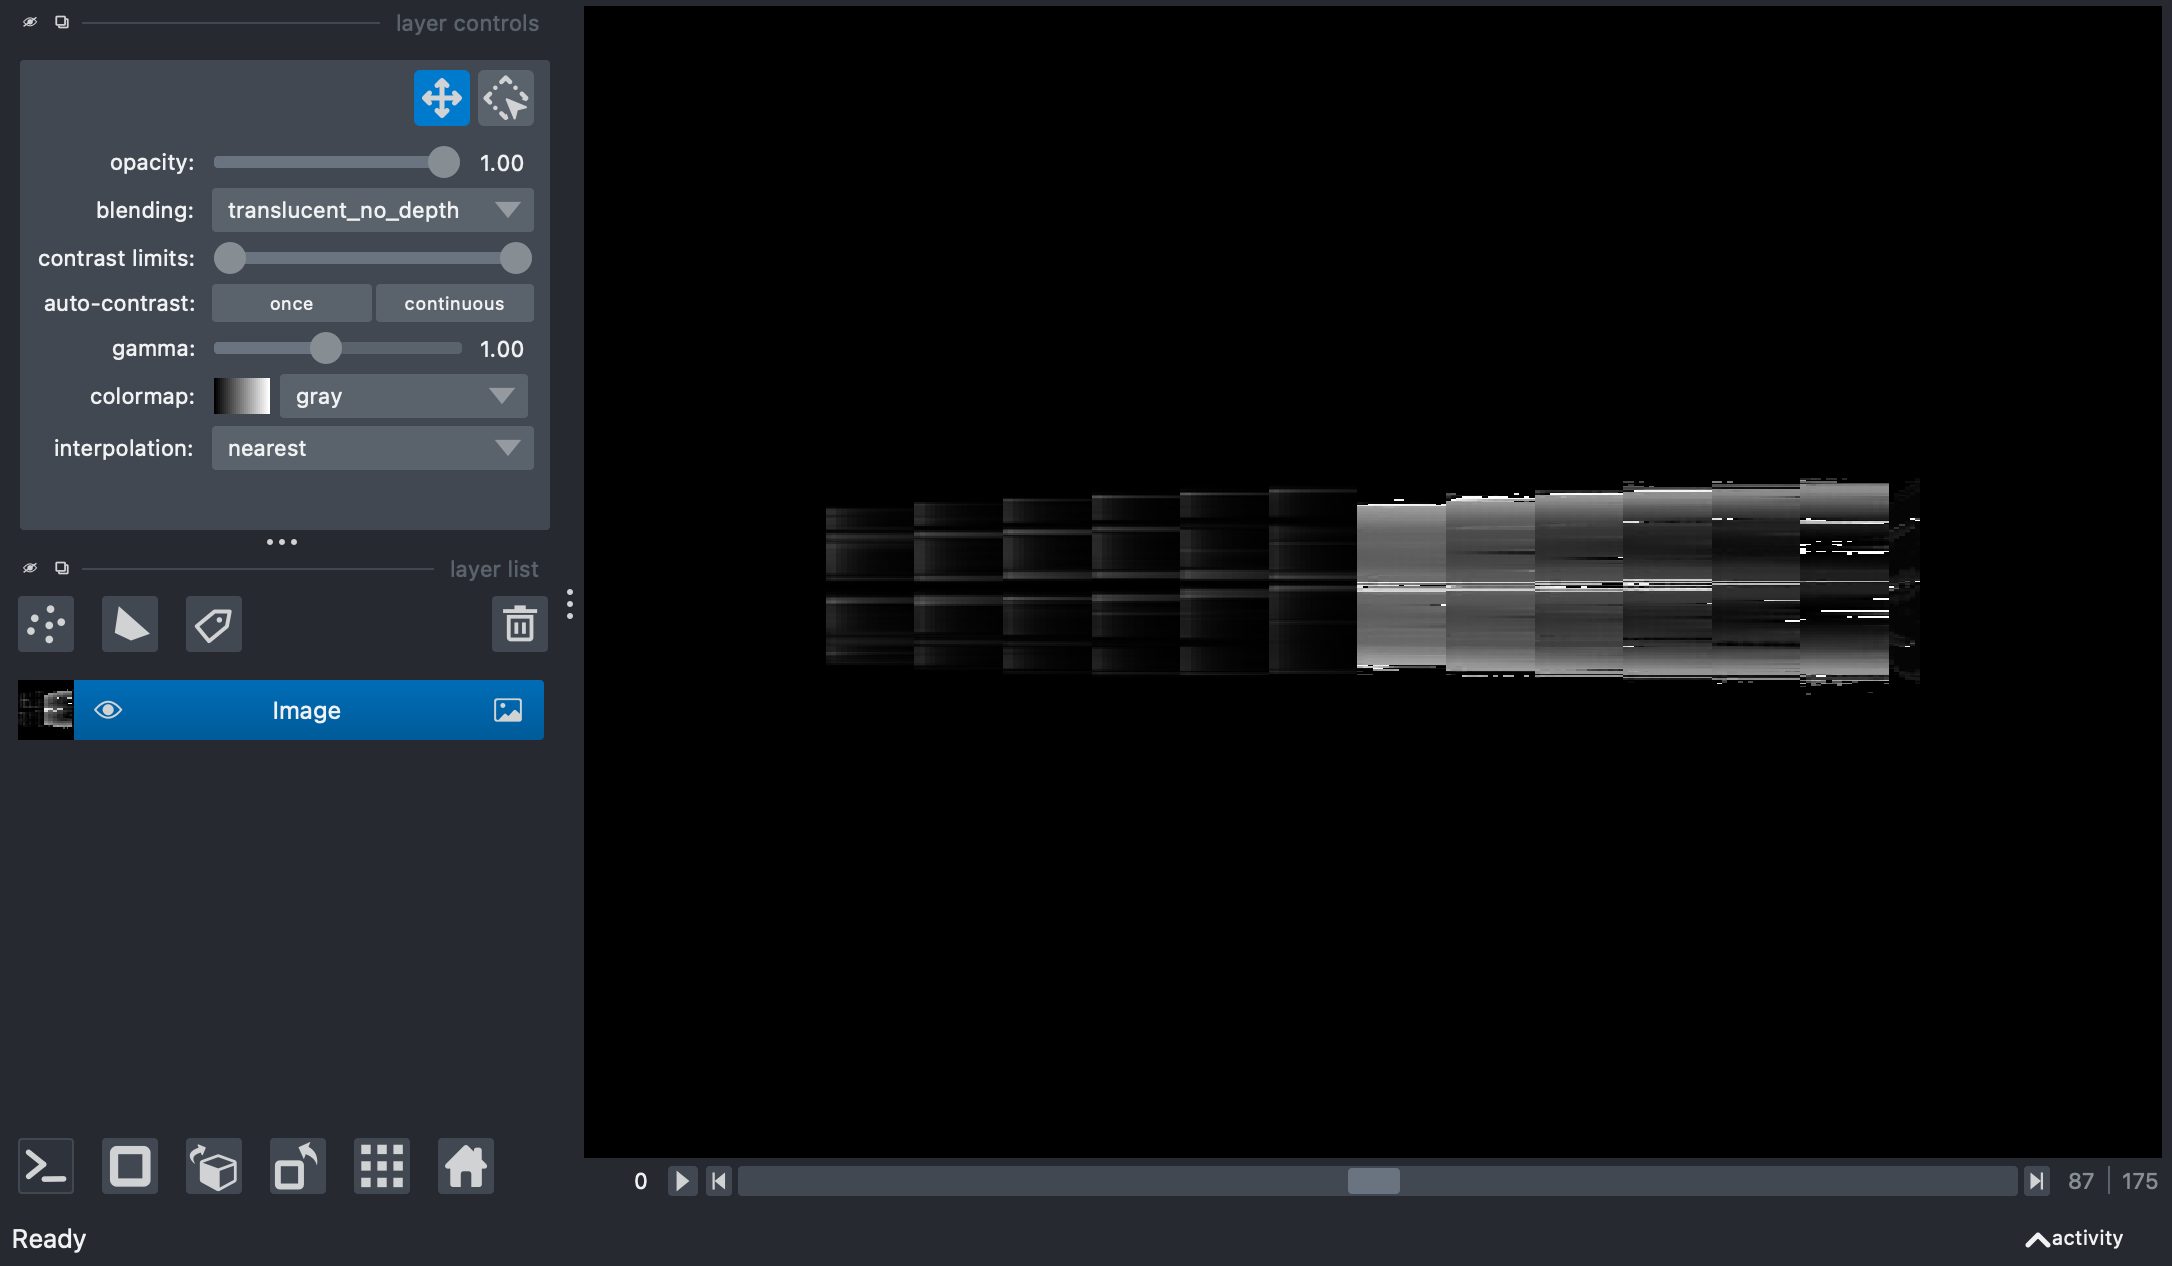

In [9]:
viewer = napari.view_image(mv.volume, scale=mv.pixel_spacing)
nbscreenshot(viewer, alt_text="MRI DICOM data visualized with napari")

### 4. Getter functions
Some methods to access common metadata
#### 4.1. Pixel spacing

In [10]:
print(mv.pixel_spacing)

(np.float64(2.84090900421142), np.float64(2.84090900421142), np.float64(10.0))


#### 4.2. Pixel format

In [11]:
print(mv.volume.dtype)

uint16


#### 4.3. Origin

In [12]:
print(mv.scanner_origin)

(np.float64(240.9552), np.float64(232.94), np.float64(-1053.7351))


#### 4.4. Orientation

In [13]:
print(mv.orientation)

('AP', 'RL', 'IS')


---
# Dependencies

In [14]:
%load_ext watermark

%watermark
%watermark --iversions

Last updated: 2024-10-22T11:18:41.780258+02:00

Python implementation: CPython
Python version       : 3.12.7
IPython version      : 8.27.0

Compiler    : Clang 14.0.6 
OS          : Darwin
Release     : 24.0.0
Machine     : x86_64
Processor   : i386
CPU cores   : 12
Architecture: 64bit

napari    : 0.5.4
ormir_mids: 0.0.2



---
<a name="thanks"></a>
# Acknowledgements

- This notebook was developed within Building the workshop [Sharing and Curating Open Data in Musculoskeletal Imaging Research](https://github.com/ORMIRcommunity/2024_2nd_ORMIR_WS) organized by the [ORMIR community](https://ormircommunity.github.io/)
- Main financial support by the [Swiss National Science Foundation (SNSF)](https://www.snf.ch/en)   
Sponsors: [Balgrist Campus](https://www.balgristcampus.ch/), [Schulthess Klinik](https://www.schulthess-klinik.ch/en), [Zurich Tourism Office](https://www.zuerich.com/en)

---
<a name="attribution"></a>

Notebook created using the [template](https://github.com/ORMIRcommunity/templates/blob/main/ORMIR_nb_template.ipynb) of the [ORMIR community](https://ormircommunity.github.io/) (version 1.0, 2023)